**DELHI HOUSE PRICE PREDICTION**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('/Users/srivatsa/MagicBricks.csv')

In [3]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
data.drop(columns =['Locality'], inplace=True)

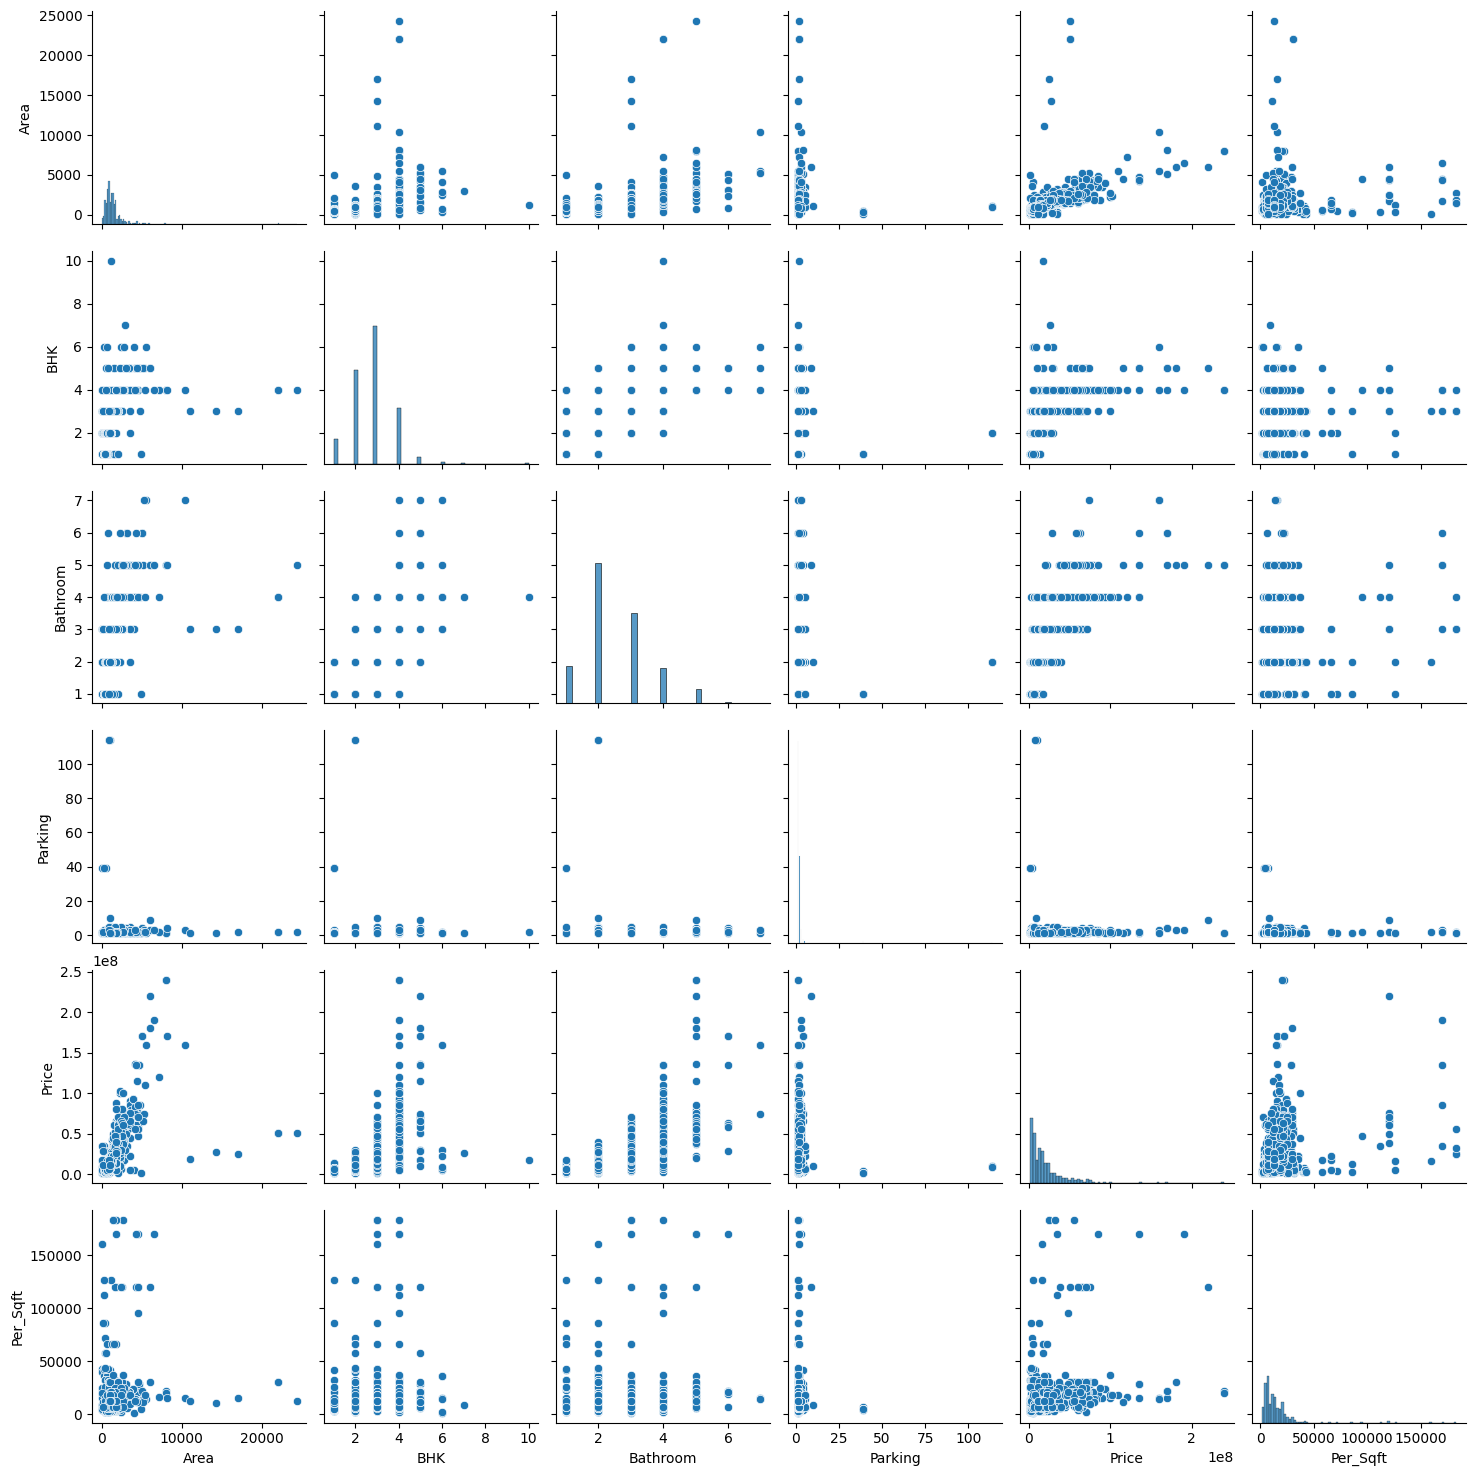

In [5]:
sns.pairplot(data)

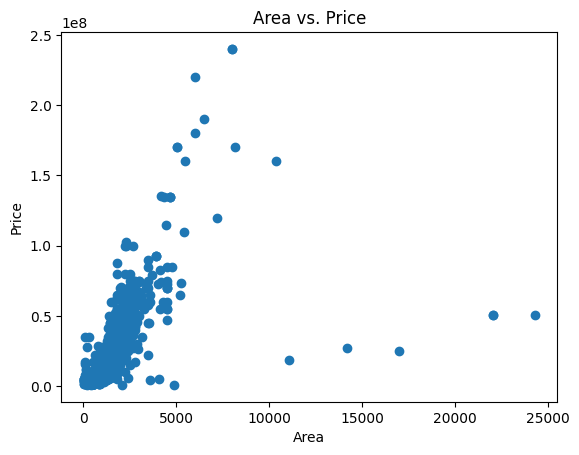

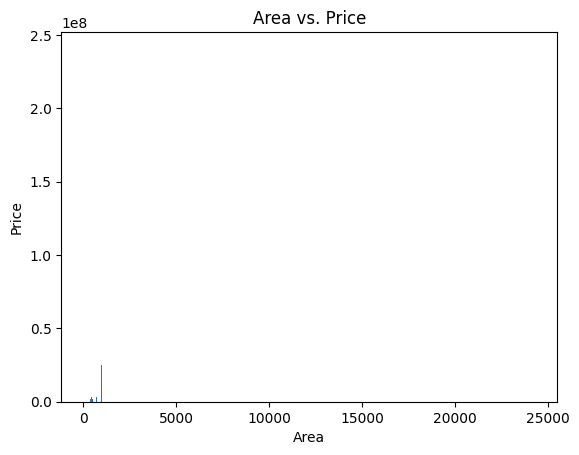

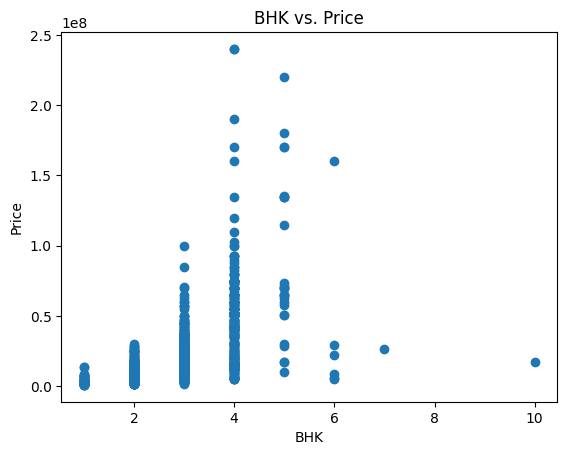

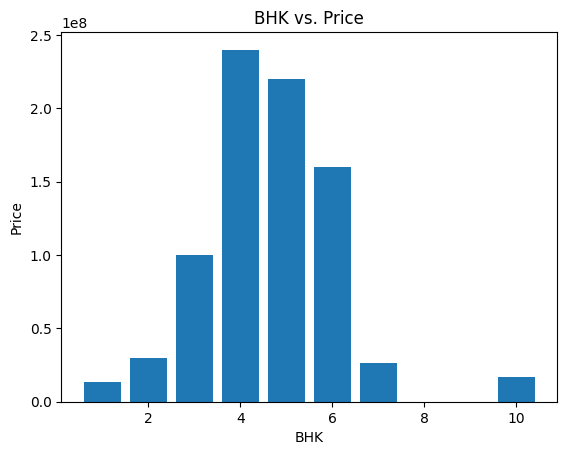

In [6]:
plt.scatter(data['Area'], data['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price')
plt.show()

plt.bar(data['Area'], data['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price')
plt.show()

plt.scatter(data['BHK'], data['Price'])
plt.xlabel('BHK')
plt.ylabel('Price')
plt.title('BHK vs. Price')
plt.show()

plt.bar(data['BHK'], data['Price'])
plt.xlabel('BHK')
plt.ylabel('Price')
plt.title('BHK vs. Price')
plt.show()


In [7]:
data.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [8]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data >0]
missing_data

Bathroom        2
Furnishing      5
Parking        33
Type            5
Per_Sqft      241
dtype: int64

In [9]:
data_add = ['Bathroom', 'Furnishing', 'Parking', 'Type', 'Per_Sqft']

for column in data_add:
    most_frequent_value = data[column].mode().iloc[0]
    data[column].fillna(most_frequent_value, inplace=True)  

In [10]:
data.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,12500.0
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [11]:
for column in data_add:
    most_frequent_value = data[column].mode().iloc[0]
    data[column].fillna(most_frequent_value, inplace=True)    

In [12]:
label_encoder = LabelEncoder()

In [13]:
data['Furnishing'] = label_encoder.fit_transform(data['Furnishing'])
data['Status'] = label_encoder.fit_transform(data['Status'])
data['Transaction'] = label_encoder.fit_transform(data['Transaction'])
data['Type'] = label_encoder.fit_transform(data['Type'])

In [14]:
data.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,1.0,6500000,1,0,1,12500.0
1,750.0,2,2.0,1,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,1.0,6200000,1,0,1,6667.0


In [15]:
scaler = MinMaxScaler()
data_scaled = ['Area', 'BHK', 'Bathroom', 'Price', 'Per_Sqft']

data[data_scaled] = scaler.fit_transform(data[data_scaled])

In [16]:
data.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,0.031806,0.222222,0.166667,1,1.0,0.023013,1,0,1,0.061739
1,0.029746,0.111111,0.166667,1,1.0,0.016736,1,0,0,0.029702
2,0.037986,0.111111,0.166667,0,1.0,0.060669,1,1,0,0.029702
3,0.023566,0.111111,0.166667,1,1.0,0.013389,1,1,1,0.029702
4,0.025626,0.111111,0.166667,1,1.0,0.021757,1,0,1,0.029702


In [17]:
y= data['Price']

In [18]:
data.drop(columns = ['Price'])

,Area,BHK,Bathroom,Furnishing,Parking,Status,Transaction,Type,Per_Sqft
0,0.031806,0.222222,0.166667,1,1.0,1,0,1,0.061739
1,0.029746,0.111111,0.166667,1,1.0,1,0,0,0.029702
2,0.037986,0.111111,0.166667,0,1.0,1,1,0,0.029702
3,0.023566,0.111111,0.166667,1,1.0,1,1,1,0.029702
4,0.025626,0.111111,0.166667,1,1.0,1,0,1,0.029702
...,...,...,...,...,...,...,...,...,...
1254,0.168507,0.333333,0.666667,2,3.0,1,0,1,0.064023
1255,0.042106,0.222222,0.166667,1,3.0,1,1,1,0.064023
1256,0.034896,0.222222,0.333333,1,3.0,1,0,1,0.064023
1257,0.039634,0.111111,0.166667,2,1.0,1,1,1,0.064023


In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state =13) 

In [20]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)
pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, pred)
print("R-squared Score:", r2)

Mean Squared Error: 1.6418000652534403e-30
Root Mean Squared Error: 1.2813274621475341e-15
R-squared Score: 1.0
